# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Portfolio/Walmart/Data'

In [3]:
import os
import os.path
import pandas as pd

In [72]:
features_data = pd.read_csv(os.path.join(data_path, 'features.csv'))
stores_data = pd.read_csv(os.path.join(data_path, 'stores.csv'))
train_data = pd.read_csv(os.path.join(data_path, 'train.csv'))

# Preprocessing

In [74]:
# Merge features data with stores data
features_stores = pd.merge(features_data, stores_data, on = 'Store', how = 'outer')
features_stores

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [75]:
# Merge the above merged dataset with train data
merged_data = pd.merge(features_stores, train_data, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
merged_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48


In [76]:
import time
from datetime import datetime

In [77]:
# Convert the Date column
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Year'] = merged_data['Date'].dt.year

In [78]:
# Remove invalid sales values
merged_data['Weekly_Sales'].dropna()

,Weekly_Sales
0,24924.50
1,50605.27
2,13740.12
3,39954.04
4,32229.38
...,...
421565,2487.80
421566,5203.31
421567,56017.47
421568,6817.48


In [79]:
# Fill missing values with 0 values
merged_data.fillna(0)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Year
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,1,24924.50,2,2010
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2,50605.27,2,2010
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,3,13740.12,2,2010
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,4,39954.04,2,2010
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,5,32229.38,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80,10,2012
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31,10,2012
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47,10,2012
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48,10,2012


In [80]:
# Set the Date column as the index and sort the data by Date
merged_data.set_index('Date', inplace = True)
merged_data.sort_index(inplace = True)
merged_data

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Year
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,2,2010
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,B,103681,3,14612.19,2,2010
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,B,103681,4,26323.15,2,2010
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,B,103681,5,36414.63,2,2010
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,B,103681,6,11437.81,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,A,219622,49,7770.71,10,2012
2012-10-26,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,A,219622,50,1486.00,10,2012
2012-10-26,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,A,219622,52,4738.93,10,2012


# Exploratory Data Analysis (EDA)

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Total Weekly Sales')

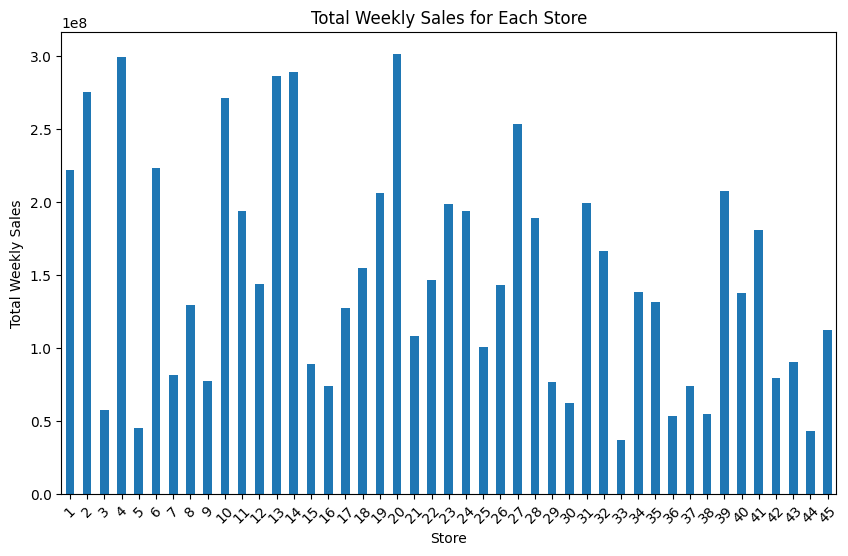

In [82]:
# Find the total weekly sales for each Store
weekly_sales = merged_data.groupby(by = 'Store')['Weekly_Sales'].sum()

plt.figure(figsize = (10,6))
weekly_sales.plot(kind = 'bar', rot = 45)

plt.title('Total Weekly Sales for Each Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

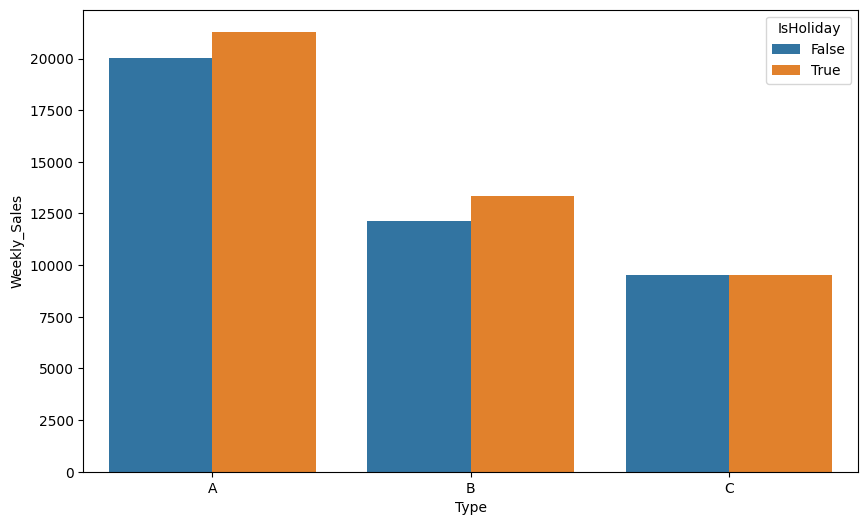

In [83]:
# Find the average weekly sales by store type and holiday status
avg_weekly_sales_by_type_isholiday = merged_data.groupby(by = ['Type', 'IsHoliday'])['Weekly_Sales'].mean().reset_index()

plt.figure(figsize = (10,6))
sns.barplot(data = avg_weekly_sales_by_type_isholiday, x = 'Type', y = 'Weekly_Sales', hue = 'IsHoliday')

In [84]:
# Calculate the average weekly sales for every Store and Dept
avg_weekly_sales_by_store_dept = merged_data.groupby(by = ['Store', 'Dept'])['Weekly_Sales'].mean()
avg_weekly_sales_by_store_dept

Store  Dept
1      1       22513.322937
       2       46102.090420
       3       13150.478042
       4       36964.154476
       5       24257.941119
                   ...     
45     94       3690.272090
       95      52896.166643
       96          2.970000
       97       6466.961888
       98        561.239037
Name: Weekly_Sales, Length: 3331, dtype: float64

In [85]:
# Calculate the total weekly sales depending on the store and on the indicator of if there's a holiday or not
total_weekly_sales = merged_data.groupby(['Store', 'IsHoliday'])['Weekly_Sales'].sum().reset_index()
df = total_weekly_sales.pivot_table(index = 'Store', columns = 'IsHoliday', values = 'Weekly_Sales')
df

IsHoliday,False,True
Store,,
1,2.057453e+08,16657476.56
2,2.545898e+08,20792669.00
3,5.320862e+07,4378110.50
4,2.771129e+08,22431026.24
5,4.188067e+07,3595016.07
6,2.069471e+08,16809079.27
7,7.487427e+07,6724002.65
8,1.201979e+08,9753308.60
9,7.189971e+07,5889508.21


Text(0, 0.5, 'Average Sales per Square Foot')

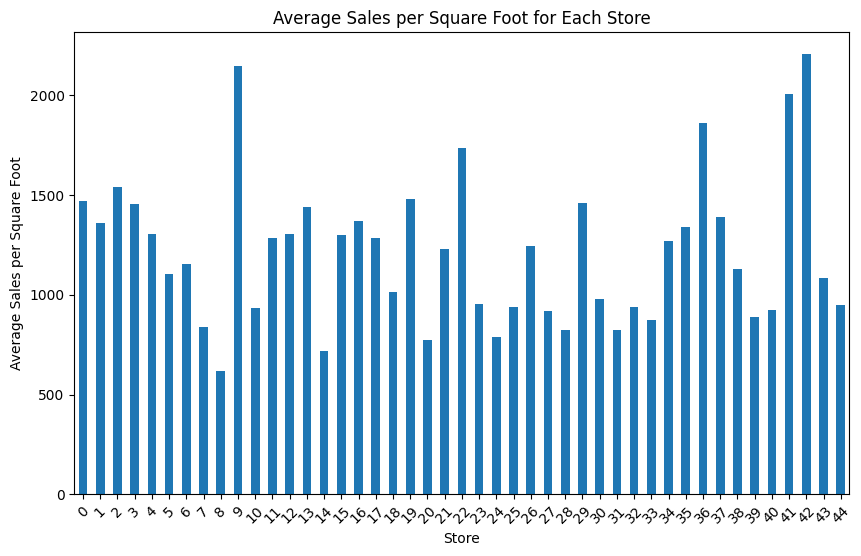

In [86]:
# Calculate the average sales per square foot for each store
weekly_sales_by_store_size = merged_data.groupby(by = ['Store', 'Size'])['Weekly_Sales'].sum().reset_index()

avg_sales_per_sqft = weekly_sales_by_store_size['Weekly_Sales'] / (weekly_sales_by_store_size['Size'])

avg_sales_per_sqft.plot(kind = 'bar', figsize = (10,6), rot = 45)

plt.title('Average Sales per Square Foot for Each Store')
plt.xlabel('Store')
plt.ylabel('Average Sales per Square Foot')

Text(0, 0.5, 'Ratio')

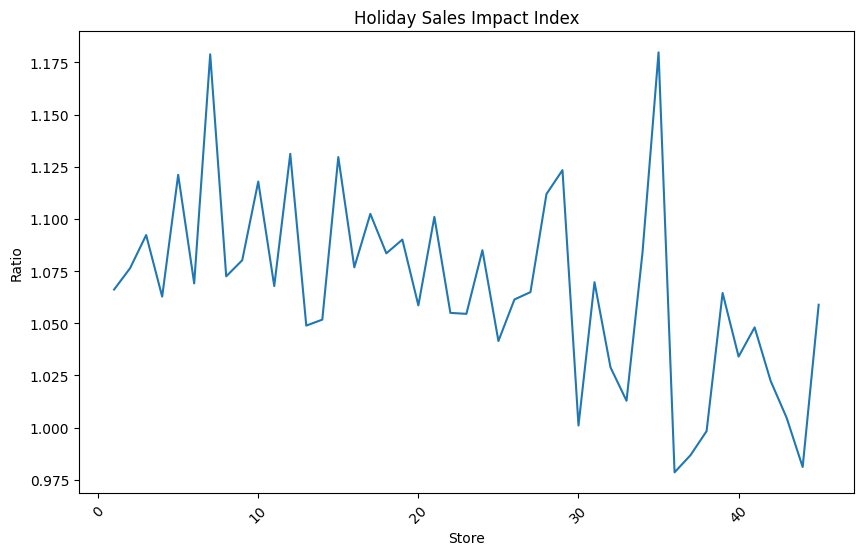

In [87]:
# Calculate the Holiday Sales Impact Index
avg_holiday_sales = merged_data.groupby(by = ['Store', 'IsHoliday'])['Weekly_Sales'].mean().reset_index()

avg_holiday_sales_pivot = avg_holiday_sales.pivot_table(index = 'Store', columns = 'IsHoliday', values = 'Weekly_Sales')

avg_holiday_sales_pivot.columns = ['Non-Holiday', 'Holiday']

avg_holiday_sales_pivot['Ratio'] = avg_holiday_sales_pivot['Holiday'] / avg_holiday_sales_pivot['Non-Holiday']

avg_holiday_sales_pivot['Ratio'].plot(figsize = (10,6), rot = 45)

plt.title('Holiday Sales Impact Index')
plt.xlabel('Store')
plt.ylabel('Ratio')

In [88]:
# Calculate the total markdown for each record
merged_data['Total_Markdown'] = merged_data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis = 1)

In [89]:
# Compute the average total markdown for every store type and holiday status
avg_total_markdown = merged_data.groupby(by = ['Type', 'IsHoliday'])['Total_Markdown'].mean().reset_index()

avg_total_markdown_pivot = avg_total_markdown.pivot_table(index = 'Type', columns = 'IsHoliday', values = 'Total_Markdown')

avg_total_markdown_pivot

IsHoliday,False,True
Type,,
A,7409.545534,18753.751974
B,5524.025920,15565.012189
C,696.344345,875.456488


In [90]:
# Compute the average weekly sales for every store type and holiday status
avg_weekly_sales = merged_data.groupby(by = ['Type', 'IsHoliday'])['Weekly_Sales'].mean().reset_index()

avg_weekly_sales_pivot = avg_weekly_sales.pivot_table(index = 'Type', columns = 'IsHoliday', values = 'Weekly_Sales')

avg_weekly_sales_pivot

IsHoliday,False,True
Type,,
A,20008.746759,21297.517824
B,12153.067752,13346.164062
C,9518.528116,9532.963131


In [91]:
# Compute the average monthly sales for the top 4 departments (largest total weekly sales)
total_weekly_sales_by_dept = merged_data.groupby(by = 'Dept')['Weekly_Sales'].sum()

top_4_dept_by_total_weekly_sales = total_weekly_sales_by_dept.nlargest(4).index

top_4_dept = merged_data[merged_data['Dept'].isin(top_4_dept_by_total_weekly_sales)]

top_4_dept_avg_monthly_sales = top_4_dept.groupby(by = ['Month', 'Dept'])['Weekly_Sales'].mean().unstack().fillna(0)

top_4_dept_avg_monthly_sales

Dept,38,72,92,95
Month,,,,
1,65172.404694,42298.576000,77310.529778,63755.449639
2,63503.286500,66902.741078,77970.267741,66319.530981
3,63700.427487,49386.926055,74313.096205,67274.400222
4,62434.924905,41621.896880,71896.322476,68581.447873
5,62142.710759,38981.218091,71973.294444,72647.939500
6,59086.131983,40946.453553,71810.139368,76793.174205
7,59220.548302,40111.074814,71019.244317,75829.782254
8,59361.338103,44680.094634,74464.936017,74735.687641
9,59840.988769,44019.866491,74754.274838,70388.782513


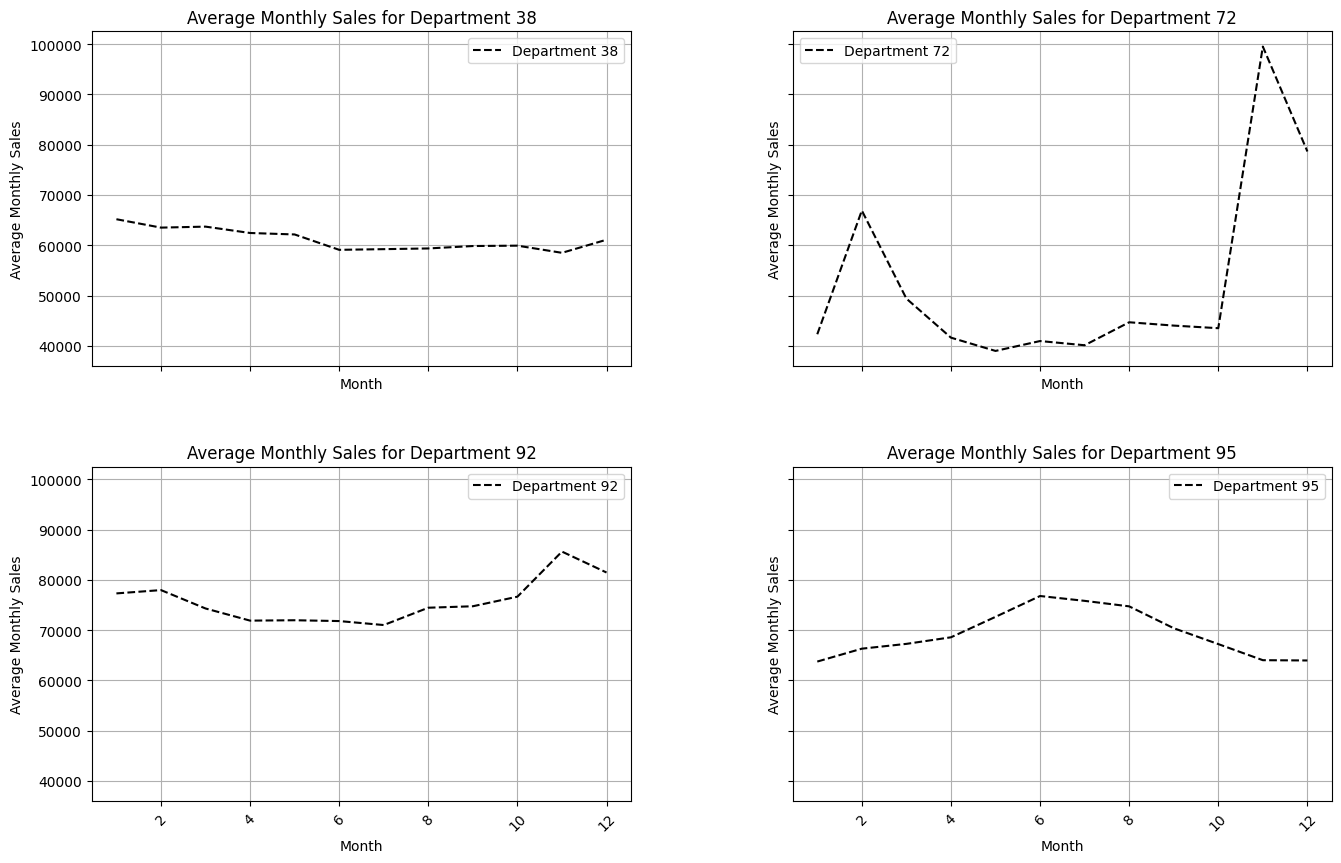

In [92]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10), sharex = True, sharey = True)
axs = axs.flatten()

for i, dept in enumerate(top_4_dept_avg_monthly_sales.columns):
    axs[i].plot(top_4_dept_avg_monthly_sales.index, top_4_dept_avg_monthly_sales[dept], label = f'Department {dept}', linestyle = '--', color = 'black')
    axs[i].set_title(f'Average Monthly Sales for Department {dept}')
    axs[i].legend(loc = 'best')
    axs[i].tick_params(axis = 'x', rotation = 45)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Average Monthly Sales')
    axs[i].grid(True)

plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

In [93]:
# Calculate the total weekly sales and average temperature over time
total_weekly_sales_over_time = merged_data.groupby(by = 'Date')['Weekly_Sales'].sum().reset_index()

avg_temp_over_time = merged_data.groupby(by = 'Date')['Temperature'].mean().reset_index()

Text(0.5, 0.98, 'Total Weekly Sales and Average Temperature Over Time')

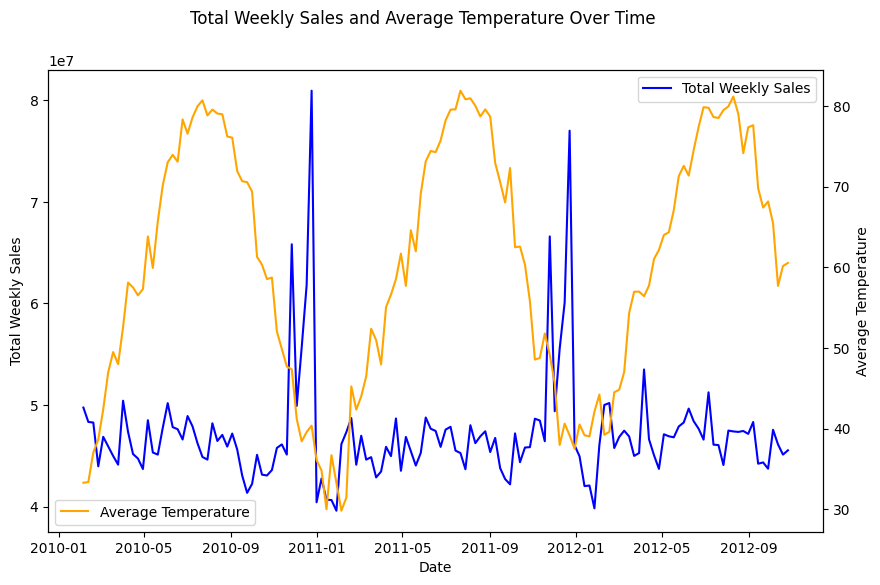

In [94]:
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.plot(total_weekly_sales_over_time['Date'], total_weekly_sales_over_time['Weekly_Sales'], label = 'Total Weekly Sales', color = 'blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Weekly Sales')
ax1.legend(loc = 'best')

ax2 = ax1.twinx()

ax2.plot(avg_temp_over_time['Date'], avg_temp_over_time['Temperature'], label = 'Average Temperature', color = 'orange')
ax2.set_ylabel('Average Temperature')
ax2.legend(loc = 'best')

fig.suptitle('Total Weekly Sales and Average Temperature Over Time')

In [95]:
merged_data.loc[:, 'Black_Friday'] = np.where((merged_data.index==datetime(2010, 11, 26).date()) | (merged_data.index==datetime(2011, 11, 25).date()), 'yes', 'no')
merged_data.loc[:, 'Pre_Christmas'] = np.where((merged_data.index==datetime(2010, 12, 23).date()) | (merged_data.index==datetime(2010, 12, 24).date()) | (merged_data.index==datetime(2011, 12, 23).date()) | (merged_data.index==datetime(2011, 12, 24).date()), 'yes', 'no')
merged_data.loc[:, 'Black_Friday'] = 'Black_Friday_' + merged_data.loc[:, 'Black_Friday']
merged_data.loc[:, 'Pre_Christmas'] = 'Pre_Christmas_' + merged_data.loc[:, 'Pre_Christmas']

merged_data

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Year,Total_Markdown,Black_Friday,Pre_Christmas
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,2,2010,0.00,Black_Friday_no,Pre_Christmas_no
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,B,103681,3,14612.19,2,2010,0.00,Black_Friday_no,Pre_Christmas_no
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,B,103681,4,26323.15,2,2010,0.00,Black_Friday_no,Pre_Christmas_no
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,B,103681,5,36414.63,2,2010,0.00,Black_Friday_no,Pre_Christmas_no
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,B,103681,6,11437.81,2,2010,0.00,Black_Friday_no,Pre_Christmas_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,A,219622,49,7770.71,10,2012,17985.13,Black_Friday_no,Pre_Christmas_no
2012-10-26,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,A,219622,50,1486.00,10,2012,17985.13,Black_Friday_no,Pre_Christmas_no
2012-10-26,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,A,219622,52,4738.93,10,2012,17985.13,Black_Friday_no,Pre_Christmas_no


In [96]:
type_dummies = pd.get_dummies(merged_data['Type'], drop_first=True)
store_dummies = pd.get_dummies(merged_data['Store'], drop_first=True)
dept_dummies = pd.get_dummies(merged_data['Dept'], drop_first=True)
holiday_dummies = pd.get_dummies(merged_data['IsHoliday'], drop_first=True)

month_dummies = pd.get_dummies(merged_data['Month'], drop_first=True)

Black_Friday_dummies = pd.get_dummies(merged_data['Black_Friday'], drop_first=True)
Pre_christmas_dummies = pd.get_dummies(merged_data['Pre_Christmas'], drop_first=True)

data = pd.concat([merged_data,
                  type_dummies, store_dummies, dept_dummies, holiday_dummies,
                  month_dummies,
                  Black_Friday_dummies, Pre_christmas_dummies],
                 axis=1)

data

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,35,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,...,False,False,False,False,False,False,False,True,False,False
2012-10-26,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,...,False,False,False,False,False,False,False,True,False,False
2012-10-26,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,...,False,False,False,False,False,False,False,True,False,False
